# Variational Inferenceでガウス分布のパラメータ推定

1. http://statmodeling.hatenablog.com/entry/variational-bayesian-inference-1
2. http://statmodeling.hatenablog.com/entry/variational-bayesian-inference-with-sympy

上の記事を読んだ。variational inferenceという手法があって, これを使うとMCMCサンプリングをせずに事後分布を推定できるのだそうだ. 素晴らしい.
参考文献としてPattern Recognizing and Machine Learningの10章を読むといいらしい. とても高額な書籍で手が出せないわけだが、レビュー記事とかスライド資料とかがたくさんあるので何とかなる.


variational inferenceで推定するとはつまり, パラメータの事後分布$p(\boldsymbol Z_{i} | \boldsymbol X)$を以下で示される$q^*(\boldsymbol Z_{i})$で近似することである, らしい. 証明はわからないので省略.

$$
        {\rm ln}\, q_j^*(\boldsymbol Z_j) =  \mathbb{E}_{i\neq j} [{\rm ln}\, p(\boldsymbol X, \boldsymbol Z)] + const  \tag{1}
$$

$ \boldsymbol X = \{\boldsymbol x_1, ..., \boldsymbol x_N \}$, $ \boldsymbol Z = \{\boldsymbol z_1, ..., \boldsymbol z_M \}$はそれぞれ測定データと分布のパラメータである.

今回はvariational inferenceで1変数ガウス分布のパラメータ推定をやってみた.

まずは何はなくとも尤度関数である.


$$
\begin{eqnarray}
p(\boldsymbol X \mid \mu, \tau) &=& \prod_{i=1}^N \left[
    \left( \frac {\tau} {2\pi} \right)^{ \frac {1} {2} }
    exp \left( - \frac {\tau} {2} \left( x_i - \mu \right)^2 \right)
\right]\\
&=&  \left( \frac {\tau} {2\pi} \right)^{ \frac {N} {2} }
     \prod_{i=1}^N exp \left( - \frac {\tau} {2} \left( x_i - \mu \right)^2 \right) \tag{2}
\end{eqnarray}
$$

続いて平均$\mu$とprecision/精度$\tau$の事前分布である. $\mu_0, \lambda_0, a_0, b_0$は事前分布のパラメータである. precisionは分散の逆数なのだが, これを使うのは共役事前分布がガンマ分布になってくれるからだと思う. 分散を使うと逆ガンマ分布になるので, これが嫌なのだろう.

$$
\begin{eqnarray}
p\left(\mu \mid \tau \right) &=& \mathcal {N} \left(\mu \mid \mu_0, \left(\lambda_0\tau\right)^{-1} \right) \tag{3}
\\
p\left(\tau\right) &=& {\rm Gamma} \left(\tau \mid a_0, b_0 \right)\\ \tag{4}
\end{eqnarray}
$$

(1), (2), (3), (4)から$ {\rm ln} \, q_{\mu}^*(\mu)$を求める. 対数を取ることで掛け算が足し算になるので, $\mu$に関係ない項を次々にconstにまとめることができる. 共役事前分布を使っているので, 過去の例からして$\mu$についてはガウス分布, $\tau$についてはガンマ分布になるのだろうと予想できる. 手計算による規格化が不要なのでconstは未来永劫に無視できる.

$$
\begin{eqnarray}
{\rm ln} \, q_{\mu}^*(\mu) &=& \mathbb{E}_{\tau} \left[{\rm ln}\, p(\boldsymbol X, \mu, \tau)\right] \\
&=& \mathbb{E}_{\tau} \left[{\rm ln} \left(
    p(\boldsymbol X \mid \mu, \tau)
    p\left(\mu \mid \tau \right)
    p\left(\tau\right)
\right)\right] \\
&=&  \mathbb{E}_{\tau} \left[
    {\rm ln} \left( p\left(\boldsymbol X \mid \mu, \tau\right) \right) +
    {\rm ln} \left( p\left(\mu \mid \tau \right)
\right)\right] + {\rm const} \\
&=&  \mathbb{E}_{\tau} \left[
    \sum_{i=1}^N  \left( - \frac {\tau} {2} \left( x_i - \mu \right)^2 \right) +
    \left( - \frac {\lambda_0\tau} {2} \left( \mu - \mu_0 \right)^2 \right)
\right] + {\rm const} \\
&=&  - \frac{\mathbb{E} \left[\tau\right]} {2}
\left(
    \sum_{i=1}^N \left( x_i - \mu \right)^2 +
    \lambda_{0} \left( \mu - \mu_0 \right)^2
\right)  + {\rm const} \\
\end{eqnarray}
$$

$ {\rm ln} \, q_{\mu}^*(\mu)$ が$\mu$の二次式なので, $ q_{\mu}^*(\mu)$ はガウス分布 $ \mathcal {N} \left(\mu \mid \mu_N, \lambda_{N}^{-1} \right) $となる. 各パラメータは$ {\rm ln} \, q_{\mu}^*(\mu)$の$\mu$の各係数から下のように得られる.

$$ 
2次の係数: - \frac{\mathbb{E} \left[\tau\right]} {2} \left( \lambda_{0} + N \right) = - \frac {\lambda_{N}} {2} \\
1次の係数: \mathbb{E} \left[\tau\right]\left( \lambda_{0}\mu_0 + N \bar{x} \right) = \lambda_{N}\mu_{N}
$$

$$
\begin{eqnarray}
\lambda_{N} &=& \mathbb{E} \left[\tau\right] \left( \lambda_{0} + N \right)  \\
\mu_{N} &=& \frac {  \lambda_{0}\mu_0 + N \bar{x} } { \lambda_{0} + N}
\end{eqnarray}
$$

続いて$ {\rm ln} \, q_{\tau}^*(\tau)$を求める. 以下のように$\tau$の１次と対数となる.


$$
\begin{eqnarray}
{\rm ln} \, q_{\tau}^*(\tau) &=& \mathbb{E}_{\mu} \left[{\rm ln}\, p(\boldsymbol X, \mu, \tau)\right] \\
&=& \mathbb{E}_{\mu} \left[{\rm ln} \left(
    p(\boldsymbol X \mid \mu, \tau)
    p\left(\mu \mid \tau \right)
    p\left(\tau\right)
\right)\right] \\
&=& \mathbb{E}_{\mu} \left[
    {\rm ln} \left( p\left(\boldsymbol X \mid \mu, \tau\right)\right) + 
    {\rm ln} \left( p\left(\mu \mid \tau \right)\right) + 
    {\rm ln} \left( p\left(\tau\right) \right)
\right] \\
&=& \mathbb{E}_{\mu} \left[
    \left(\frac {N} {2} {\rm ln} \,\tau - \frac {\tau} {2} \sum_{i=1}^N \left(x_{i}- \mu \right)^2\right) +
    \left(\frac {1} {2} {\rm ln} \,\tau - \frac {\lambda_{0}\tau} {2} \left(\mu- \mu_{0} \right)^2\right) +
    \left(\left(\alpha_{0}−1\right){\rm ln} \,\tau − \beta_{0} \tau\right)
\right] + {\rm const} \\
&=&
    \left(\frac {N-1} {2} + \alpha_{0} \right){\rm ln} \,\tau +
    \mathbb{E}_{\mu} \left[
        - \frac {1} {2} \sum_{i=1}^N \left(x_{i}- \mu \right)^2
        - \frac {\lambda_{0}} {2} \left(\mu- \mu_{0} \right)^2
        − \beta_{0}
    \right] \tau + {\rm const} \\
&=&
    \left(\frac {N-1} {2} + \alpha_{0} \right){\rm ln} \,\tau
    -\left(
        \frac {1} {2} \mathbb{E}_{\mu} \left[
            \sum_{i=1}^N \left(x_{i}- \mu \right)^2 +
            \lambda_{0} \left(\mu- \mu_{0} \right)^2
        \right] + \beta_{0} \right) \tau + {\rm const} \\
&=&
    \left(\frac {N-1} {2} + \alpha_{0} \right){\rm ln} \,\tau
    -\left(
        \frac {1} {2} \mathbb{E}_{\mu} \left[
            \sum_{i=1}^N \left( x_{i}^{2} - 2 x_{i}\mu + \mu^{2} \right) +
            \lambda_{0} \left(\mu^{2} - 2\mu_{0}\mu + \mu_{0}^{2} \right)
        \right] + \beta_{0} \right) \tau + {\rm const} \\
&=&
    \left(\frac {N-1} {2} + \alpha_{0} \right){\rm ln} \,\tau
    -\left(
        \frac {N + \lambda_{0}} {2} \mathbb{E} \left[\mu^{2} \right]
        - \left(N\bar{x} + \lambda_{0}\mu_{0}\right) \mathbb{E} \left[\mu \right]
        + \frac {N\bar{x^{2}} + \lambda_{0} \mu_{0}^{2}} {2} + \beta_{0} \right) \tau + {\rm const} \\
&=&
    \left(\frac {N-1} {2} + \alpha_{0} \right){\rm ln} \,\tau
    -\left(
        \frac {N + \lambda_{0}} {2} \left( \mathbb{E} \left[\mu \right]^2 + \frac{1} {\lambda_{N}} \right)
        - \left(N\bar{x} + \lambda_{0}\mu_{0}\right) \mathbb{E} \left[\mu \right]
        + \frac {N\bar{x^{2}} + \lambda_{0} \mu_{0}^{2}} {2} + \beta_{0} \right) \tau + {\rm const} \\
&=&
    \left(\frac {N-1} {2} + \alpha_{0} \right){\rm ln} \,\tau
    -\left(
        \frac {N + \lambda_{0}} {2} \mathbb{E} \left[\mu \right]^2
        - \left(N\bar{x} + \lambda_{0}\mu_{0}\right) \mathbb{E} \left[\mu \right]
        + \frac {N + \lambda_{0}} {2\lambda_{N}}
        + \frac {N\bar{x^{2}} + \lambda_{0} \mu_{0}^{2}} {2} + \beta_{0} \right) \tau + {\rm const} \\
\end{eqnarray}
$$

これはガンマ分布となる( $ {\rm ln } \, q^*\left(\tau \mid \alpha_{N}, \beta_{N} \right)=(\alpha_{N}−1) {\rm ln} \, \tau−\beta_{N} \tau + {\rm const}$ ). ガンマ分布のパラメータ $\alpha_{N}, \beta_{N} $は以下となる.

$$
\begin{eqnarray}
\alpha_{N} &=&
    \left(\frac {N+1} {2} + \alpha_{0} \right)\\
\beta_{N} &=& \frac {N + \lambda_{0}} {2} \mathbb{E} \left[\mu \right]^2
        - \left(N\bar{x} + \lambda_{0}\mu_{0}\right) \mathbb{E} \left[\mu \right]
        + \frac {N + \lambda_{0}} {2\lambda_{N}}
        + \frac {N\bar{x^{2}} + \lambda_{0} \mu_{0}^{2}} {2} + \beta_{0} \\
\end{eqnarray}
$$

できた.

## 実験

$q^*(\mu)$と$q^*(\tau)$のいずれもお互いの期待値に依存している. これを解くには以下２通りの手段がある.

1. 連立方程式として解析的に解く
2. 適当な初期値を与えて$\mathbb{E}\left[\mu\right]$と$\mathbb{E}\left[\tau\right]$を順繰りに更新する(いずれ収束することは証明されている, らしい).

ここでは2. 数値的に解く, を実験する. まず準備

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats

import pandas as pd
pd.set_option('display.width', 200)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import base64
from itertools import chain
import tempfile
import os
import subprocess
import warnings
warnings.filterwarnings('ignore')

import sympy
import sympy.stats

In [2]:
from IPython.display import Image, display, HTML
def savefig(filename):
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()
    with open(filename, "rb") as f:
        display(HTML('<img src="data:image/png;base64,{}">'.format(base64.b64encode(f.read()).decode('utf8'))))

事後分布のパラメータを更新する関数を用意する.

In [3]:
def update_mu(N, meanX, meanX2, mu0, lambda0, a0, b0, muN, lambdaN, aN, bN):
    lambdaN = aN / bN * (lambda0 + N)
    muN = (lambda0 * mu0 + N * meanX) / (lambda0 + N)
    return lambdaN, muN

def update_tau(N, meanX, meanX2, mu0, lambda0, a0, b0, muN, lambdaN, aN, bN):
    aN = (N + 1) / 2 + a0
    bN = b0 + (N + lambda0) / 2 * muN * muN \
        - (N * meanX + lambda0 * mu0) * muN \
        + (N + lambda0) / (2 * lambdaN) + (N * meanX2 + lambda0 * mu0 * mu0) / 2
    return aN, float(bN)

とりあえず[StanModeling](http://statmodeling.hatenablog.com/entry/variational-bayesian-inference-with-sympy)と同じ条件で$q_{\mu}^{*}(\mu), q_{\tau}^{*}(\tau) $を推定してみる. $\mu_{N}$の初期値を3, $\lambda_{N}$の初期値を10として, パラメータを10回更新する.

In [4]:
X = pd.DataFrame([1.1, 1.0, 1.3])
mu0 = 0
lambda0 = 1
a0 = 1
b0 = 1
N = X.size
meanX = float(X.mean())
meanX2 = float((X*X).mean())

muN = 3
lambdaN = 10
aN = None
bN = None

for i in range(10):
    aN, bN = update_tau(N, meanX, meanX2, mu0, lambda0, a0, b0, muN, lambdaN, aN, bN)
    lambdaN, muN = update_mu(N, meanX, meanX2,  mu0, lambda0, a0, b0, muN, lambdaN, aN, bN)
    print(muN, lambdaN, aN, bN)

0.8500000000000001 1.0958904109589043 3.0 10.95
0.8500000000000001 3.603603603603604 3.0 3.3299999999999996
0.8500000000000001 5.825242718446603 3.0 2.0599999999999996
0.8500000000000001 6.492335437330929 3.0 1.8483333333333332
0.8500000000000001 6.618660946836219 3.0 1.8130555555555554
0.8500000000000001 6.640194697066736 3.0 1.8071759259259257
0.8500000000000001 6.643797285578193 3.0 1.8061959876543208
0.8500000000000001 6.644398097084033 3.0 1.8060326646090534
0.8500000000000001 6.644498242899829 3.0 1.8060054441015088
0.8500000000000001 6.644514934162626 3.0 1.8060009073502514


収束したらしい. 可視化してみると[StanModeling](http://statmodeling.hatenablog.com/entry/variational-bayesian-inference-with-sympy)と同じ結果が得られたらしいことが確認できた.

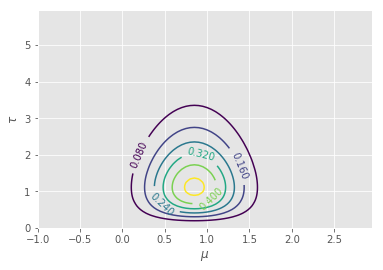

In [5]:
delta = 0.05
x = np.arange(-1.0, 3.0, delta)
y = np.arange(0.0, 6.0, delta)
X, Y = np.meshgrid(x, y)

q_mu = lambda x: sp.stats.norm.pdf(x, muN, np.sqrt(1/lambdaN))
q_tau = lambda x: sp.stats.gamma.pdf(x, a=aN, scale=1/bN)
f = lambda x,y: q_mu(x) * q_tau(y)
Z = f(X, Y)

cs = plt.contour(X, Y, Z)
plt.clabel(cs, inline=1, fontsize=10)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\tau$')
plt.savefig("vi1_01.png")

## データ数を増やしてみた

適当な1変数正規分布から50点サンプリングして$ \boldsymbol X $を用意する.　このデータから分布のパラメータを推定し, 事後予測分布を作成して$ \boldsymbol X $と比較した.

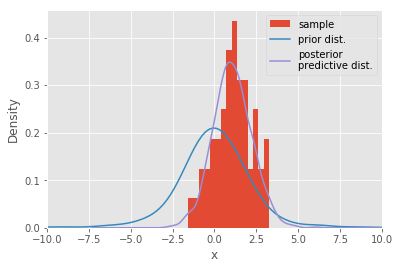

In [6]:
# data
np.random.seed(0)
X = pd.DataFrame(np.random.normal(1, 1, 50), columns=['sample'])
N = X.size
meanX = float(X.mean())
meanX2 = float((X*X).mean())

# prior distribution
mu0 = 0
lambda0 = 1
a0 = 1
b0 = 1

# initial values
muN = 3
lambdaN = 10
aN = None
bN = None

# estimate parameters
for i in range(10):
    aN, bN = update_tau(N, meanX, meanX2, mu0, lambda0, a0, b0, muN, lambdaN, aN, bN)
    lambdaN, muN = update_mu(N, meanX, meanX2,  mu0, lambda0, a0, b0, muN, lambdaN, aN, bN)

# prior distribution
mu = np.random.normal(mu0, np.sqrt(1/lambda0), 2000)
tau = np.random.gamma(a0, 1/b0, 2000)
priorX = pd.DataFrame(np.random.normal(mu, np.sqrt(1/tau)), columns=['prior dist.'])

# estimate posterior predicitive distribution
mu = np.random.normal(muN, np.sqrt(1/lambdaN), 2000)
tau = np.random.gamma(aN, 1/bN, 2000)
postX = pd.DataFrame(np.random.normal(mu, np.sqrt(1/tau)), columns=['posterior\npredictive dist.'])

# plot
ax = X.plot.hist(normed=True, bins=15)
priorX.plot.kde(ax=ax)
postX.plot.kde(ax=ax)
ax.set_xlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel(r'Density')
plt.savefig("vi1_02.png");

それらしいように見える.

１変数の１ガウス分布の推定ができたので, 次は多変数か混合分布についてやってみたい.